In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling

In [2]:
# need to load data after cleaning is done based on eda
df = pd.read_csv('../data/UCI_Credit_Card.csv') 

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [6]:
# clean data as per eda
df['default'] = df['default.payment.next.month']
# apply other updates from eda

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , make_scorer
from sklearn.model_selection import train_test_split

In [12]:
y = df['default'].copy()
y.sample(5)

11903    0
24539    0
607      0
11558    0
20495    0
Name: default, dtype: int64

In [17]:
features  = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
X= df[features].copy()
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [87]:
X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size= 0.30, random_state= 42)

In [88]:
classifier = DecisionTreeClassifier(max_depth= 4)
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = Y_test, y_pred= predictions)

0.8192222222222222

In [90]:
from sklearn.linear_model import LogisticRegression 
import numpy as np
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test)
accuracy_score(y_true = Y_test, y_pred= predictions)
#accuracy_score(y_true = len(predictions)* [0], y_pred= predictions)


/Users/pankaj/anaconda/envs/ML7331/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7822222222222223

In [86]:
#predictions
sum(predictions)

0

In [101]:
aa= np.array([1])
aa[0]
aa=df.loc[:, features]


TypeError: 'numpy.ndarray' object is not callable

In [141]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df.loc[:, features].values
X = StandardScaler().fit_transform(X)
y = df.loc[:, ['default']].values
#y = StandardScaler().fit_transform(X)

X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size= 0.30, random_state= 42)
#pca = PCA(14)
pca = PCA(0.95)
comps = pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)



In [142]:
from sklearn.linear_model import LogisticRegression 
import numpy as np
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test)
classifier.score(X_test, Y_test)
#accuracy_score(y_true = Y_test, y_pred= predictions)

/Users/pankaj/anaconda/envs/ML7331/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pankaj/anaconda/envs/ML7331/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8065555555555556

In [150]:
#from sklearn.linear_model import DecisionTreeClassifier
import numpy as np
classifier = DecisionTreeClassifier(max_depth=4)
classifier.fit(X_train, Y_train)
predictions = classifier.predict(X_test)
classifier.score(X_test, Y_test)
#accuracy_score(y_true = Y_test, y_pred= predictions)

0.8075555555555556

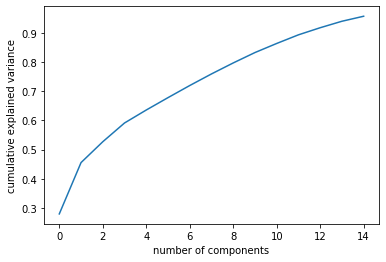

In [148]:
pd.DataFrame(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [153]:
aa_f=pd.DataFrame(X_train)